## Import tools

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
##Unpickle df
df = pd.read_pickle('job_titles_plus_topics')

In [4]:
df.head()

,title,company,location,uid,tags,degree_or_experience,machine_learning,academic_research,business_or_marketing,application_materials,...,experiments,security_clearance,risk_assessment,benefits,software_engineering,project_management,product_development,engineering,employer_requirements,speech_recognition
0,PhD Program & Lab Manager (Hybrid) job,Mass General Brigham,"Charlestown, MA",48022361,"[PhD, Masters Degree, Bachelor's Degree, Entry...",0.0,0.00000,0.01878,0.0,0.00000,...,0.00366,0.00957,0.00284,0.00545,0.00078,0.05476,0.00016,0.00032,0.00157,0.00777
1,PhD Program & Lab Manager (Hybrid) job,Massachusetts General Hospital,"Charlestown, MA",47983977,"[PhD, Masters Degree, Bachelor's Degree, Entry...",0.0,0.00000,0.01878,0.0,0.00000,...,0.00366,0.00957,0.00284,0.00545,0.00078,0.05476,0.00016,0.00032,0.00157,0.00777
2,Assistant Professor - Clinical PhD Program - L...,Bertelsmann,"Los Angeles, CA",48973936,"[PhD, Fortune500, Media, Junior, Full-Time]",0.0,0.00459,0.02206,0.0,0.01601,...,0.00000,0.00000,0.00000,0.02368,0.00000,0.00000,0.00000,0.00000,0.00023,0.00000
3,Data Scientist / Statistician Intern (BS / MS ...,Lubrizol,"Hazelwood, DE",39232138,"[PhD, Bachelor's Degree, Data Science, Program...",0.0,0.11196,0.00000,0.0,0.00000,...,0.00000,0.00000,0.00030,0.00000,0.00000,0.02286,0.00000,0.01745,0.00000,0.00000
4,PhD Scientist Internship job,Danaher Corporation,"Madison, WI",49810371,"[PhD, Fortune500, Publicly Listed, Conglomerat...",0.0,0.00282,0.00000,0.0,0.00103,...,0.00000,0.01058,0.00000,0.00000,0.00000,0.03010,0.00386,0.00767,0.01534,0.00000


In [23]:
df.shape

(5179, 24)

## Let's see if we can predict whether a job is academic or industry

In [10]:
df['academic'] = df.company.str.contains('University|College')

In [11]:
df.head()

,title,company,location,uid,tags,degree_or_experience,machine_learning,academic_research,business_or_marketing,application_materials,...,security_clearance,risk_assessment,benefits,software_engineering,project_management,product_development,engineering,employer_requirements,speech_recognition,academic
0,PhD Program & Lab Manager (Hybrid) job,Mass General Brigham,"Charlestown, MA",48022361,"[PhD, Masters Degree, Bachelor's Degree, Entry...",0.0,0.00000,0.01878,0.0,0.00000,...,0.00957,0.00284,0.00545,0.00078,0.05476,0.00016,0.00032,0.00157,0.00777,False
1,PhD Program & Lab Manager (Hybrid) job,Massachusetts General Hospital,"Charlestown, MA",47983977,"[PhD, Masters Degree, Bachelor's Degree, Entry...",0.0,0.00000,0.01878,0.0,0.00000,...,0.00957,0.00284,0.00545,0.00078,0.05476,0.00016,0.00032,0.00157,0.00777,False
2,Assistant Professor - Clinical PhD Program - L...,Bertelsmann,"Los Angeles, CA",48973936,"[PhD, Fortune500, Media, Junior, Full-Time]",0.0,0.00459,0.02206,0.0,0.01601,...,0.00000,0.00000,0.02368,0.00000,0.00000,0.00000,0.00000,0.00023,0.00000,False
3,Data Scientist / Statistician Intern (BS / MS ...,Lubrizol,"Hazelwood, DE",39232138,"[PhD, Bachelor's Degree, Data Science, Program...",0.0,0.11196,0.00000,0.0,0.00000,...,0.00000,0.00030,0.00000,0.00000,0.02286,0.00000,0.01745,0.00000,0.00000,False
4,PhD Scientist Internship job,Danaher Corporation,"Madison, WI",49810371,"[PhD, Fortune500, Publicly Listed, Conglomerat...",0.0,0.00282,0.00000,0.0,0.00103,...,0.01058,0.00000,0.00000,0.00000,0.03010,0.00386,0.00767,0.01534,0.00000,False


In [12]:
df[df.academic == True].shape

(763, 24)

In [13]:
df[df.academic == False].shape

(4416, 24)

In [15]:
df[df.academic == True].tail()

,title,company,location,uid,tags,degree_or_experience,machine_learning,academic_research,business_or_marketing,application_materials,...,security_clearance,risk_assessment,benefits,software_engineering,project_management,product_development,engineering,employer_requirements,speech_recognition,academic
5162,Instructor Pool - 2022 / 2023 Humanitarian Eng...,Oregon State University,"Corvallis, OR",49829687,"[PhD, Bachelor's Degree, Mechanical Engineerin...",0.0000,0.00000,0.00000,0.00000,0.02065,...,0.05958,0.0,0.00000,0.00000,0.00000,0.0000,0.01956,0.01471,0.00691,True
5164,Post-Doctoral Research Associate - Auditory Co...,Carnegie Mellon University,"Pittsburgh, PA",49827417,"[PhD, Biology, Universities, Junior, Programmi...",0.0023,0.00069,0.04703,0.01027,0.01498,...,0.02117,0.0,0.02040,0.00000,0.01003,0.0000,0.00420,0.01119,0.00399,True
5167,PostDoctoral Associate - Allen Lab job,University of Virginia,"Charlottesville, VA",49823087,"[PhD, Universities, Junior, Postdoc, Academic ...",0.0000,0.00000,0.06016,0.00000,0.04647,...,0.00000,0.0,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,True
5168,"Open Rank Professor of Pharmacology, Tenured /...",University of Virginia,"Charlottesville, VA",49823020,"[PhD, Universities, Junior, Full-Time, MD, Lec...",0.0000,0.00000,0.02628,0.00000,0.09710,...,0.00000,0.0,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,True
5178,Research Fellow job,University of Michigan,"Ann Arbor, MI",49806221,"[PhD, Universities, Junior, Postdoc, Academic ...",0.0000,0.00000,0.04179,0.00000,0.00000,...,0.00000,0.0,0.03265,0.00667,0.00000,0.0062,0.00000,0.00000,0.00000,True


## First Linear Regression model

In [18]:
y = df.academic
X = df.loc[:,'degree_or_experience':'speech_recognition']

In [19]:
## Split into train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [32]:
#logreg = LogisticRegression()
## Result for unbalanced = .889

## Looks like overfitting, cross validation could help.
## Adding balanced parameter did improve precision.
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))



0.8937967656287714
0.8667953667953668


In [33]:
## baseline = guess every job is industry (since 85 percent of jobs are industry)
print(4416/5179)

0.8526742614404326


In [38]:
## try with cross-validation
## looks like it actually may not be overfitting? 
## Little variation in between the folds.
logreg.fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("cross validation scores:", scores)
print("model score: %.3f" % logreg.score(X_test, y_test))

cross validation scores: [0.89264174 0.88661037 0.90470446 0.88768116 0.90096618]
model score: 0.867


In [45]:
print(logreg.feature_names_in_)
print(logreg.coef_)

## Biggest predictors = application materials and teaching

['degree_or_experience' 'machine_learning' 'academic_research'
 'business_or_marketing' 'application_materials' 'bio_or_med_lab'
 'data_science' 'teaching' 'experiments' 'security_clearance'
 'risk_assessment' 'benefits' 'software_engineering' 'project_management'
 'product_development' 'engineering' 'employer_requirements'
 'speech_recognition']
[[-4.26991981 -6.7487919   7.7831924  -6.26611652 11.71983621  3.36609453
  -2.30539456 12.638705   -0.96296184 -5.37046377 -3.04235487  2.77388976
  -4.04155115 -5.06880806 -6.27760525 -5.95249786 -3.17416668 -2.96828019]]


In [49]:
feature_names = [x for x in logreg.feature_names_in_]
feature_names

['degree_or_experience',
 'machine_learning',
 'academic_research',
 'business_or_marketing',
 'application_materials',
 'bio_or_med_lab',
 'data_science',
 'teaching',
 'experiments',
 'security_clearance',
 'risk_assessment',
 'benefits',
 'software_engineering',
 'project_management',
 'product_development',
 'engineering',
 'employer_requirements',
 'speech_recognition']

In [60]:
coeffs = logreg.coef_.reshape(-1,1)
coeffs


array([[-4.26991981],
       [-6.7487919 ],
       [ 7.7831924 ],
       [-6.26611652],
       [11.71983621],
       [ 3.36609453],
       [-2.30539456],
       [12.638705  ],
       [-0.96296184],
       [-5.37046377],
       [-3.04235487],
       [ 2.77388976],
       [-4.04155115],
       [-5.06880806],
       [-6.27760525],
       [-5.95249786],
       [-3.17416668],
       [-2.96828019]])

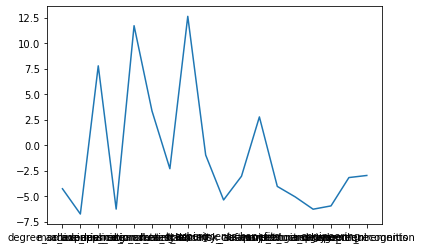

In [63]:
plt.plot(feature_names, coeffs)

## Try with GridSearchCV to find optimal C

In [65]:
## Try with gridsearch CV
hyper_param_grid = {'C': [.01, .1, 1.0, 10.0]}
lr = GridSearchCV(LogisticRegression(), hyper_param_grid, cv=5, n_jobs=-1)
lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0]})

In [66]:
lr.best_estimator_.score(X_test, y_test)

0.9111969111969112

In [68]:
lr.cv_results_

{'mean_fit_time': array([0.01594315, 0.01740785, 0.02416277, 0.02783904]),
 'std_fit_time': array([0.00302044, 0.00197463, 0.00191395, 0.00403291]),
 'mean_score_time': array([0.00237961, 0.00252037, 0.00262084, 0.00139451]),
 'std_score_time': array([4.50565447e-05, 3.72623982e-04, 1.36762400e-04, 8.14151099e-05]),
 'param_C': masked_array(data=[0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1.0}, {'C': 10.0}],
 'split0_test_score': array([0.84680338, 0.84680338, 0.87937274, 0.91435464]),
 'split1_test_score': array([0.84680338, 0.84680338, 0.87816647, 0.91797346]),
 'split2_test_score': array([0.84680338, 0.84680338, 0.8721351 , 0.9119421 ]),
 'split3_test_score': array([0.84661836, 0.84661836, 0.87801932, 0.92028986]),
 'split4_test_score': array([0.84782609, 0.84782609, 0.87681159, 0.89975845]),
 'mean_test_score': array([0.84697092, 0.84697092, 0.87690104, 0.9128

In [72]:
lr_feature_names = [x for x in lr.best_estimator_.feature_names_in_]
lr_feature_names

['degree_or_experience',
 'machine_learning',
 'academic_research',
 'business_or_marketing',
 'application_materials',
 'bio_or_med_lab',
 'data_science',
 'teaching',
 'experiments',
 'security_clearance',
 'risk_assessment',
 'benefits',
 'software_engineering',
 'project_management',
 'product_development',
 'engineering',
 'employer_requirements',
 'speech_recognition']

In [74]:
lr_coeffs = lr.best_estimator_.coef_.reshape(-1,1)
lr_coeffs

array([[ -7.60967805],
       [-11.9408471 ],
       [ 13.9016868 ],
       [-12.6771737 ],
       [ 22.90117757],
       [  3.85486698],
       [ -2.91471763],
       [ 17.66805142],
       [ -3.40834089],
       [ -9.12176681],
       [ -6.11072053],
       [  2.81503042],
       [ -7.41868384],
       [ -9.59213519],
       [-14.58051422],
       [-12.17326659],
       [ -7.13307603],
       [ -5.36131393]])

In [79]:
float(lr_coeffs[0])

-7.6096780541731786

In [88]:
data = {}

for i in range(len(lr_feature_names)):
    data[lr_feature_names[i]] = float(lr_coeffs[i])
data

    


{'degree_or_experience': -7.6096780541731786,
 'machine_learning': -11.940847098940466,
 'academic_research': 13.901686802374345,
 'business_or_marketing': -12.67717369707461,
 'application_materials': 22.90117756700751,
 'bio_or_med_lab': 3.8548669789717382,
 'data_science': -2.9147176265698147,
 'teaching': 17.668051418639983,
 'experiments': -3.408340887427955,
 'security_clearance': -9.121766810862864,
 'risk_assessment': -6.110720534645951,
 'benefits': 2.8150304216438222,
 'software_engineering': -7.418683837068391,
 'project_management': -9.592135191477086,
 'product_development': -14.58051422097422,
 'engineering': -12.1732665916937,
 'employer_requirements': -7.133076025304387,
 'speech_recognition': -5.361313927137421}

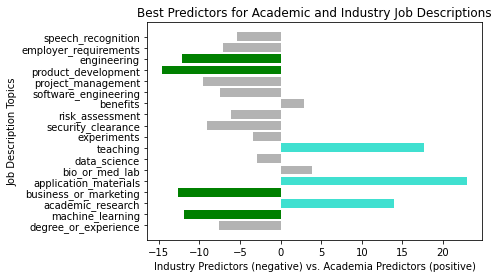

In [121]:
names = list(data.keys())
values = list(data.values())

plt.barh(range(len(data)), values, tick_label=names, color=('0.7',
                                                           'green',
                                                           'turquoise',
                                                           'green',
                                                           'turquoise',
                                                           '0.7',
                                                           '0.7',
                                                           'turquoise',
                                                           '0.7',
                                                           '0.7',
                                                           '0.7',
                                                           '0.7',
                                                           '0.7',
                                                           '0.7',
                                                           'green',
                                                           'green',
                                                           '0.7',
                                                           '0.7'))
plt.title('Best Predictors for Academic and Industry Job Descriptions')
plt.xlabel('Industry Predictors (negative) vs. Academia Predictors (positive)')
plt.ylabel('Job Description Topics')
plt.savefig('JD_Topic_Regression_Coefficients.png', bbox_inches='tight')
plt.show()

In [35]:
## Confusion Matrix for first logreg
y_pred = logreg.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[798, 109],
       [ 29, 100]])

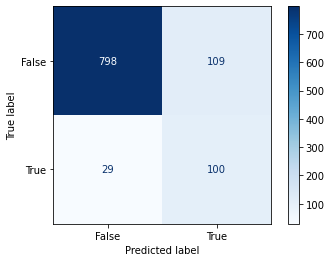

In [34]:
## Plot confusion matrix, code adapted from example here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
predictions = logreg.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()